##### Se cargan las librerías

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit




##### Se carga un dataset de scikit learn,  se mezclan los datos y se los divide en datos de entrenamiento y datos de validacion

In [2]:
def cargar_datos_prueba():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target.ravel()
    print "X: ",len(X),"x.shape: ",X.shape
    print "y: ",len(y),"y.shape: ",y.shape
    # Se genera una division aleatoria entre datos de prueba y entrenamiento
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.20, random_state=42)
    
    return (X,y,X_train,y_train,X_test, y_test)


In [114]:
X,y,X_train,y_train,X_test, y_test = cargar_datos_prueba()

X:  150 x.shape:  (150, 4)
y:  150 y.shape:  (150,)


#### Metodo para graficar los elementos del modelo

In [115]:
def graficar(nombre_kernel,clf):
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title("Kernel "+nombre_kernel)
    plt.show()

    

In [132]:
def plot_matrix(clf, X_test, y_test):
    plt.clf()
    plt.imshow(confusion_matrix(clf.predict(X_test), y_test),
               interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show()
    
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


#### Se entrena el modelo y se retornan las predicciones para un conjunto de datos

In [117]:
def entrenar_kernel(nombre_kernel,X_train,y_train,X_test):
    clf = svm.SVC(kernel=nombre_kernel, probability=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return (clf,y_pred)


##### Para las diferencias hacer: 
##### 1. classication_report(), con valores como recall, y precision, f1-score.
##### 2. score(precision).
##### 3. Matriz de confusion.
##### de los datos de prueba contra los datos de validacion.

In [118]:
def imprimir_estadisticas(nombre_kernel,mykernel,X_test,y_pred,y_test):
    print ""
    print "Kernel testeado: ",nombre_kernel
    print classification_report(y_pred, y_test)
    print "La matriz de confusion obtenida es la siguiente:"
    print confusion_matrix(y_pred, y_test)
    print ""
    print "Precision media del kernel: ",mykernel.score(X_test, y_test)
    print ""
    print ""
    
    

##### Se entrenan y compara el rendimiento de los kernels con los datos de prueba

In [ ]:
ShuffleSplit?



Kernel testeado:  poly
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

La matriz de confusion obtenida es la siguiente:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Precision media del kernel:  1.0




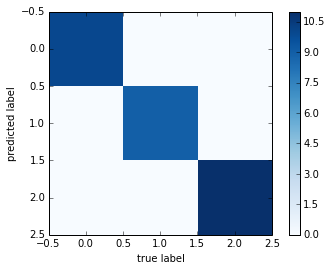

In [122]:
kernel2,y_pred2 = entrenar_kernel('poly',X_train,y_train,X_test)
imprimir_estadisticas('poly',kernel2,X_test,y_pred2,y_test)
plot_matrix(kernel2, X_test, y_test)
#graficar('rbf',kernel)



Kernel testeado:  rbf
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

La matriz de confusion obtenida es la siguiente:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Precision media del kernel:  1.0




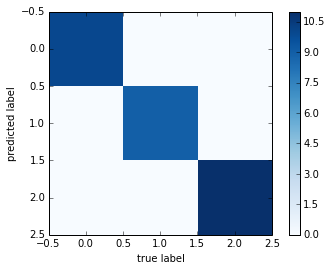

In [123]:
kernel,y_pred = entrenar_kernel('rbf',X_train,y_train,X_test)
imprimir_estadisticas('rbf',kernel,X_test,y_pred,y_test)
plot_matrix(kernel, X_test, y_test)
#graficar('rbf',kernel)


### Punto 1.5) Cuantificación de la calidad de las predicciones  

##### Funciones previas 

In [124]:
#Area under the curve(ROC)
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#Accuracy
from sklearn.metrics import accuracy_score

#Log_loss
from sklearn.metrics import log_loss
from sklearn.svm.libsvm import predict_proba

In [125]:

#Probar con test_size 20 - 25%.
def cargar_datos_prueba_binarios():
    iris = datasets.load_iris()
    X = iris.data
    # Se hace el ravel() con los labels debido a que la libreria los organiza en varios shapes.
    y = iris.target.ravel()
    # Se genera una division aleatoria entre datos de prueba y entrenamiento
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.20, random_state=42)
    y_test_bin = label_binarize(y_test,classes=[0,1,2])
    return (X,y,X_train,y_train,X_test,y_test_bin)



#### Accuracy

In [126]:
#Kernel Polinomial
print "El accuracy score para el kernel polinomial es: ",accuracy_score(y_test,kernel2.predict(X_test))


El accuracy score para el kernel polinomial es:  1.0


In [127]:
#Kernel RBF
print "El accuracy score para el kernel RBF es: ",accuracy_score(y_test,kernel.predict(X_test))


El accuracy score para el kernel RBF es:  1.0


#### ROC (Area under the curve) 

In [128]:
#Kernel polynomial
#Se saca el y_score de la funcion de decision del clasificador
X,y,X_train, y_train, X_test,y_test = cargar_datos_prueba_binarios()
kernelPoly = entrenar_kernel('poly',X_train,y_train,X_test)[0]
y_scores = kernelPoly.decision_function(X_test)
print "El area bajo la curva para el kernel polinomial en SVM es: ", roc_auc_score(y_test, y_scores)*100, "%"


El area bajo la curva para el kernel polinomial en SVM es:  50.6172839506 %


In [129]:
#Kernel RBF
X,y,X_train, y_train, X_test,y_test = cargar_datos_prueba_binarios()

kernelPoly = entrenar_kernel('rbf',X_train,y_train,X_test)[0]
y_scores = kernelPoly.decision_function(X_test)
print "El area bajo la curva para el kernel rbf en SVM es: ", roc_auc_score(y_test, y_scores)*100, "%"


El area bajo la curva para el kernel rbf en SVM es:  50.4409171076 %


#### Log loss 

In [130]:
#Kernel polinomial
kernelPoly2 = entrenar_kernel('poly',X_train,y_train,X_test)[0]
print "El valor de logartmic loss es: ", log_loss(y_test,kernelPoly2.predict_proba(X_test))


El valor de logartmic loss es:  0.0847233535689


In [131]:
#Kernel rbf
kernelRBF2 = entrenar_kernel('rbf',X_train,y_train,X_test)[0]
print "El valor de logartmic loss es: ", log_loss(y_test,kernelRBF2.predict_proba(X_test))


El valor de logartmic loss es:  0.0719836506296


##### F1-Score y precision hechos arriba 